In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [4]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-05-21 20:13:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   376KB/s    in 0.2s    

2021-05-21 20:13:41 (376 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


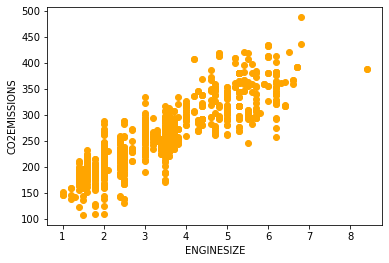

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='orange')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [18]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('Coefficient :', clf.coef_)
print('Intercept :', clf.intercept_)

Coefficient : [[ 0.         50.37123859 -1.47955873]]
Intercept : [106.62193648]


Text(0, 0.5, 'Emission')

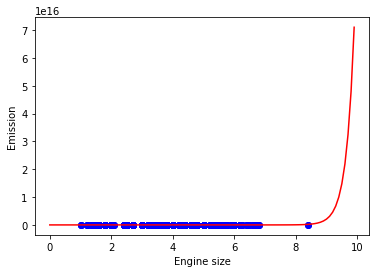

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]**xx + clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

[[ 0.         30.05230205  4.07246452 -0.45671876]]


Text(0, 0.5, 'Emission')

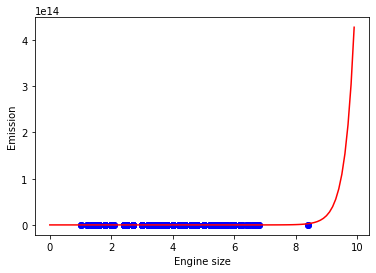

In [30]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

print(clf.coef_)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]**xx + clf.coef_[0][2]*np.power(xx,2) + clf.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")